# Initialization

## Import libraries

In [1]:
import os
import eyelinkio
import pandas as pd
import sys
import matplotlib.pyplot as plt

## Import `visualeyes`

In [2]:
# get the current working directory (location of the notebook)
notebook_dir = os.getcwd()

# path to the visualeyes package
visualeyes_path = os.path.abspath(os.path.join(notebook_dir, "..")) # Go up one directory

# add the path to sys.path
if visualeyes_path not in sys.path:
    sys.path.append(visualeyes_path)

# import visualeyes
import visualeyes

## Fetch Example Data

In [3]:
# define the path to the edf file
current_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_path, "..", "data"))
edf_path = os.path.join(data_dir, 'TG_2015.EDF')

# Analysis

## Convert edf file to pandas dataframes

In [4]:
# read the edf file
edf = eyelinkio.read_edf(edf_path)

# convert the edf file to a dicitionary of pandas dataframes
edf_dfs = edf.to_pandas()

loadEvents = 1
setTrial End:  END
loadEvents = 1


## Demo 1: visualize data quality of the first 300ms into a trial

In [5]:
# add time column to the dataframes
edf_dfs['samples']['time'] = edf['times']
# get trial data
trial_data = edf_dfs['discrete']['trials']

In [6]:
# epoch the first 300ms of every trial
trial_start = trial_data['stime'].values
duration = 300/1000 # 300ms = 0.3s

# get the data, here we are interested in all samples collected
all_data = edf_dfs['samples']

# epoch the data
epochs, epoched_data = visualeyes.epoch_data(all_data, trial_start, duration)
epoched_data

,xpos,ypos,ps,time,epoch_index
0,599.200012,452.500000,510.0,0.000,0
1,599.500000,454.200012,511.0,0.002,0
2,600.000000,455.899994,511.0,0.004,0
3,600.400024,457.299988,512.0,0.006,0
4,600.700012,459.100006,513.0,0.008,0
...,...,...,...,...,...
664938,773.200012,544.400024,147.0,1329.876,89
664939,773.099976,545.200012,147.0,1329.878,89
664940,773.000000,545.700012,147.0,1329.880,89
664941,773.000000,546.200012,148.0,1329.882,89


In [15]:
# try define_aoi
aoi_definitions =[{'shape': 'circle', 'coordinates': (600, 600, 100)}]
width, height = edf['info']['screen_coords']

aoi_mask = visualeyes.define_aoi((height, width), aoi_definitions)



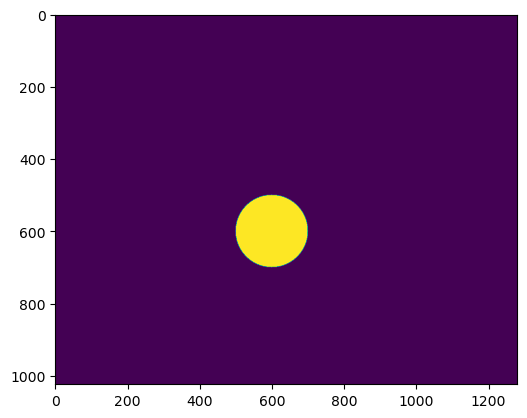

In [16]:
plt.imshow(aoi_mask)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

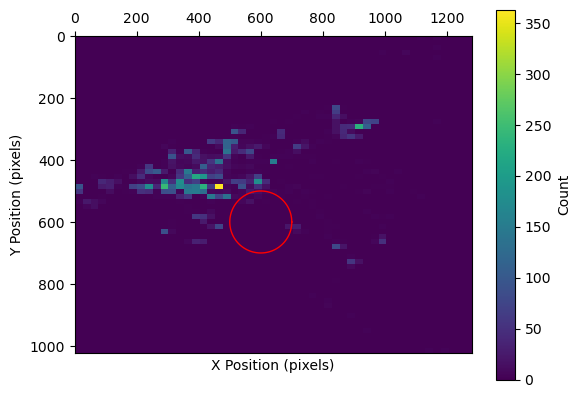

In [18]:
visualeyes.plot_heatmap(epoched_data, screen_dimensions = (height, width), aoi_definitions=aoi_definitions)